In [52]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import numpy as np

In [38]:
# Cargar datos del Ipeco
data = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
data.columns = ['ipeco', 'coyuntura', 'expectativas', 'sea', 'da', 'sef', 'df', 'iif', 'ipecotm']

In [39]:
# Crear un dataframe vacío, con fechas mensuales desde el inicio del Ipeco
fecha = pd.date_range(start='2001-12-01', end='2021-02-01', freq='MS')
ipeco = pd.DataFrame(index=fecha)
data = ipeco.merge(data, how='left', left_index=True, right_index=True)
data = data.interpolate(method='linear')

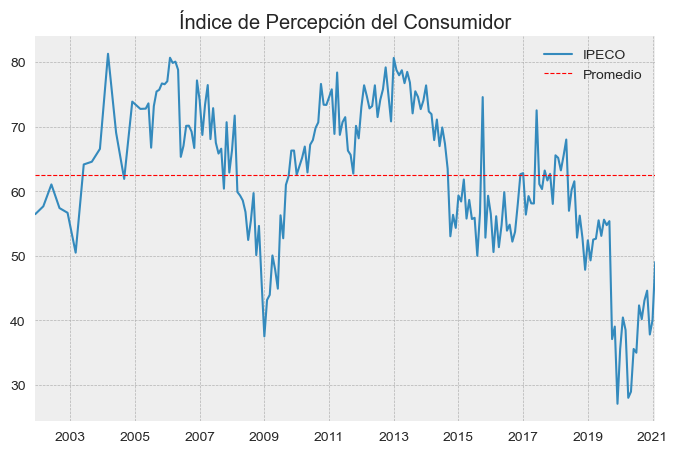

In [42]:
ax = data['ipeco'].plot(linewidth=1.5, figsize=(8,5), label='IPECO')
ax.axhline(data['ipeco'].mean(), label='Promedio', ls='--', color='red', linewidth=0.8)
plt.title('Índice de Percepción del Consumidor')
plt.legend()

In [43]:
# Valores iniciales del Ipeco:
ipeco0 = 0.564465028
coyuntura0 = 0.375772273
expectativas0 = 0.688636166
sea0 = 0.503225806
da0 = 0.241887388
sef0 = 0.778145695
df0 = 0.502857143
iif0 = 0.78490566

data['ipeco'] = data['ipeco']*ipeco0
data['coyuntura'] = data['coyuntura']*coyuntura0
data['expectativas'] = data['expectativas']*expectativas0
data['sea'] = data['sea']*sea0
data['da'] = data['da']*da0
data['sef'] = data['sef']*sef0
data['df'] = data['df']*df0
data['iif'] = data['iif']*iif0

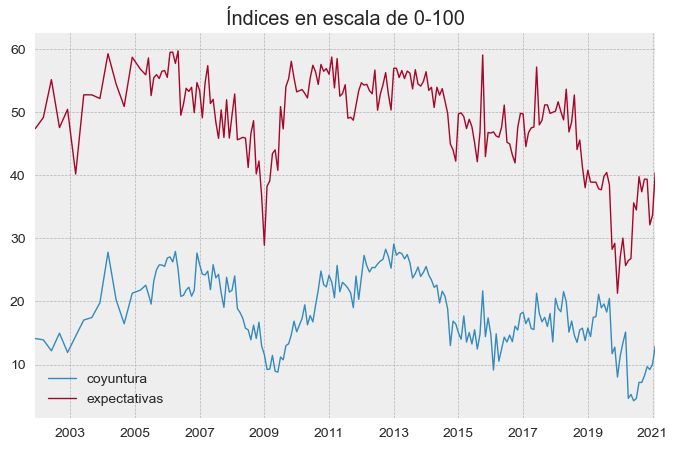

In [44]:
ax = data[['coyuntura','expectativas']].plot(linewidth=1, figsize=(8,5), label='IPECO')
plt.title('Índices en escala de 0-100')
plt.legend()

In [54]:
corr_mat = data[['sea', 'da', 'sef', 'df', 'iif']].corr()
corr_mat

sea        da       sef        df       iif
sea  1.000000  0.764452  0.697325  0.690882  0.659036
da   0.764452  1.000000  0.495682  0.664519  0.405547
sef  0.697325  0.495682  1.000000  0.703650  0.852387
df   0.690882  0.664519  0.703650  1.000000  0.591505
iif  0.659036  0.405547  0.852387  0.591505  1.000000


array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

<AxesSubplot:>

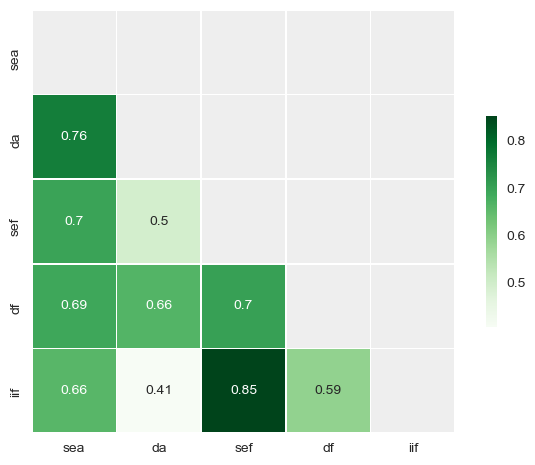

In [63]:
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, annot=True, cmap='Greens', mask=mask, center=0.5, square=True, linewidths=.5, cbar_kws={"shrink": .5})